# Ejercicio 1

## ¿Qué es el método de Runge-Kutta y cómo aproxima las soluciones a las EDO?

-->

## ¿Cuáles son las ventajas y desventajas del método de Runge-Kutta en comparación con otros métodos numéricos para EDO? (Mencione al menos 2 ventajas y 2 desventajas)

-->

## ¿Cómo se diferencia el método de Euler y el método de Runge-Kutta?

-->

## ¿Cómo se puede aplicar el método de Euler y el método de Runge-Kutta modelos epidemiológicos y modelos de depredador-presa?

-->



# Ejercicio 2

## 2.1 - Crecimiento poblacional

Considere el modelo de crecimiento logístico dado por la ecuación diferencial:
$$
\frac{dP}{dt} = rP \left(1 - \frac{P}{K}\right)
$$
Donde: \( P \) es la población en el tiempo, \( r \) es el ratio de crecimiento y \( K \) es la capacidad de carga.

Dado:
- Población inicial P0 = 10
- Ratio de crecimiento r = 0.1
- Capacidad de carga K = 1,000
- Paso del tiempo h = 0.1
- Tiempo total T = 20



Use el método de 4to orden de Runge-Kutta para estimar la población sobre el tiempo y grafique los resultados.

Interprete la gráfica y responda ¿cuál es el estimado de la población en tiempo T = 20?

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Parametros
P0 = 10
r = 0.1
K = 1000
h = 0.1
T = 20

In [5]:
# Definicion de la ecuacion diferencial
def f(t, P):
    return r * P * (1 - P / K)

In [6]:
# Método de Runge-Kutta de cuarto orden
def rungeKutta(P0, h, T):
    N = int(T / h)  # Número de pasos
    t_values = np.arange(0, T + h, h)
    P_values = np.zeros(len(t_values))
    
    P_values[0] = P0
    
    for i in range(N):
        t = t_values[i]
        P = P_values[i]
        
        k1 = f(t, P)
        k2 = f(t + h / 2, P + h / 2 * k1)
        k3 = f(t + h / 2, P + h / 2 * k2)
        k4 = f(t + h, P + h * k3)
        
        P_values[i + 1] = P + (h / 6) * (k1 + 2 * k2 + 2 * k3 + k4)
    
    return t_values, P_values

In [7]:
# Cálculo de los valores usando Runge-Kutta
t_values, P_values = rungeKutta(P0, h, T)


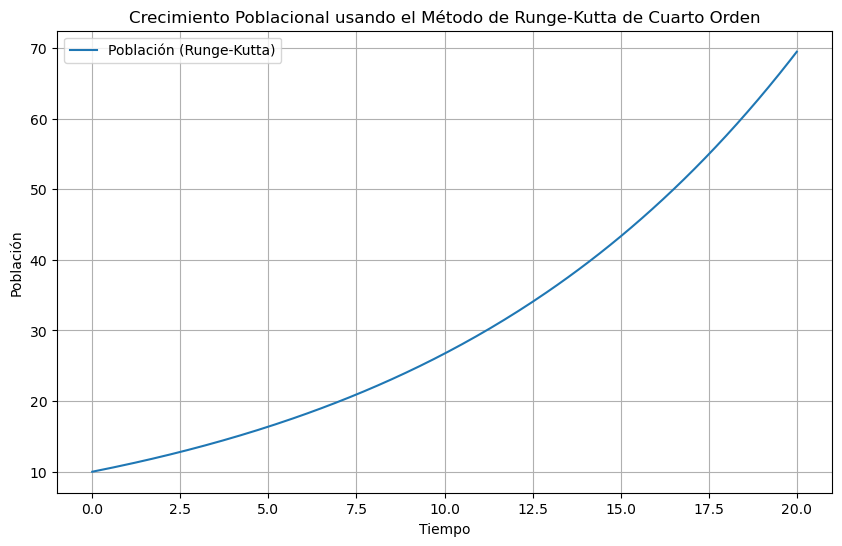

In [9]:
# Graficar los resultados
plt.figure(figsize=(10, 6))
plt.plot(t_values, P_values, label='Población (Runge-Kutta)')
plt.xlabel('Tiempo')
plt.ylabel('Población')
plt.title('Crecimiento Poblacional usando el Método de Runge-Kutta de Cuarto Orden')
plt.legend()
plt.grid(True)
plt.show()

In [10]:
# Estimado de la población en T = 20
P_estimated = P_values[-1]
P_estimated

69.45315964722215